# Module 7: Introduction to Machine Learning
**Author: Caleb Sellinger**

**Githup Repo:** [Data Fundamentals M7](https://github.com/crsellinger/datafun-07-ml)

In [108]:
import jupyterlab as jpl
import pandas as pd
import matplotlib as mlt
import spacy as sp
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line
Below is a linear relationship. Plotting Fahrenheit temperatures and their corresponding Celsius temperatures produces a straight line

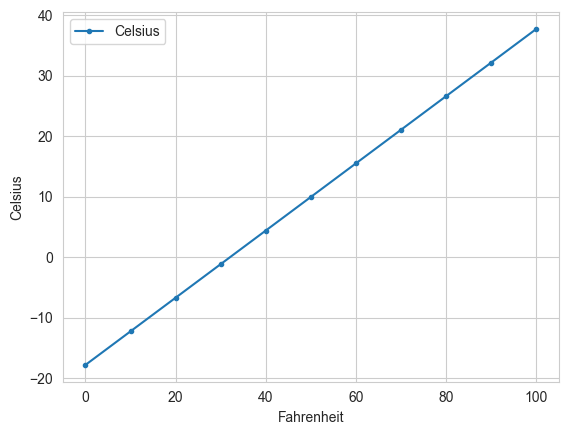

In [109]:
c = lambda f: 5/9 * (f-32)
temps = [(f,c(f)) for f in range(0,101,10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius',style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
Loading the average high temperature in January in NYC from 1895 to 2018 CSV file.

In [110]:
nyc_df = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")

### Section 2 - Data Inspection
Using the head and tail methods to view the new dataframe

In [111]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [112]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [113]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [114]:
# divide by 100 and floor to produce just the year
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

In [115]:
pd.set_option('display.precision', 2)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


### Section 5 - Build the Model

In [116]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [117]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
Temperature prediction for 2024

In [118]:
# y = mx + b
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualization

(10.0, 70.0)

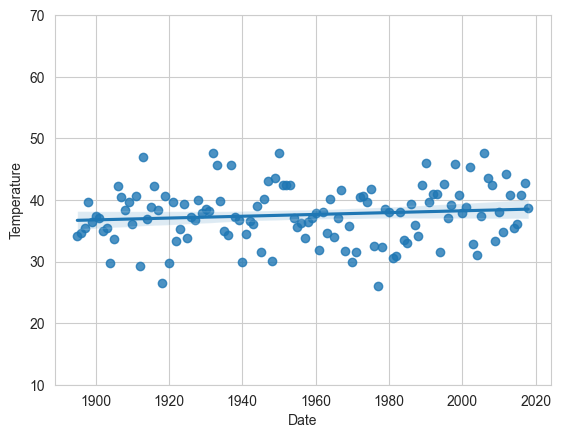

In [119]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)